# Hyperbolic t-SNE correct gradient embeddings
- Plots of (converged) embeddings using the correct hyperbolic t-sne gradient 

- Plots of wrong t-sne gradient embeddings in the limit to show that wrong gradient
eventually converge to similar looking embeddings as the correct gradient.


## Notes
- Wrong gradient embeddings are very volatile. (See .gif of larger lr embeddings wrong vs correct gradient)
  We see that the wrong gradient embeddings are very jittery due to large gradient values. In the correct gradient case, the extra term smoothes the initial jitteriness out, and the metric tensor addition smoothes out embeddings closing in on the boundary


In [16]:
import os
from pathlib import Path 
import traceback
import numpy as np
from numpy import linalg as LA
from matplotlib import pyplot as plt
import json

In [17]:
def sort_by_property(data, dataset, correct_grad, scale_fix, cf="HyperbolicKL"):
    """ 
    Check if the data fits a set of values.
    """
    if data["dataset"] != dataset:
        return False
    
    if data["correct_grad"] != correct_grad:
        return False 
    
    if data["scale_fix"] != scale_fix:
        return False 
    
    if data["cost_function"] != cf:
        return False
    
    return True

In [18]:
MNIST_HyperbolicKL_wrong_grad_experiments = []
PLANARIA_HyperbolicKL_wrong_grad_experiments = []
C_ELEGANS_HyperbolicKL_wrong_grad_experiments = []
WORDNET_HyperbolicKL_wrong_grad_experiments = []

MNIST_HyperbolicKL_correct_grad_experiments = []
PLANARIA_HyperbolicKL_correct_grad_experiments = []
C_ELEGANS_HyperbolicKL_correct_grad_experiments = []
WORDNET_HyperbolicKL_correct_grad_experiments = []

# Loop through all experiments, sort experiments by their properties
# Hyperbolic t-sne gradient only
folder = Path("experiment_results")

for exp_folder in sorted(folder.iterdir()):
    if exp_folder.is_dir():
        data_json_path = f"{exp_folder}/data.json"
        with open(data_json_path, "r") as f:
            data = json.load(f)

            # Wrong gradient, No scale_fix sorting
            if sort_by_property(data, "MNIST", False, False):
                MNIST_HyperbolicKL_wrong_grad_experiments.append(exp_folder.name)

            elif sort_by_property(data, "PLANARIA", False, False):
                PLANARIA_HyperbolicKL_wrong_grad_experiments.append(exp_folder.name)

            elif sort_by_property(data, "C_ELEGANS", False, False):
                C_ELEGANS_HyperbolicKL_wrong_grad_experiments.append(exp_folder.name)
            
            elif sort_by_property(data, "WORDNET", False, False):
                WORDNET_HyperbolicKL_wrong_grad_experiments.append(exp_folder.name)

            # Correct gradient, scale_fix sorting
            elif sort_by_property(data, "MNIST", True, True):
                MNIST_HyperbolicKL_correct_grad_experiments.append(exp_folder.name)

            elif sort_by_property(data, "PLANARIA", True, True):
                PLANARIA_HyperbolicKL_correct_grad_experiments.append(exp_folder.name)

            elif sort_by_property(data, "C_ELEGANS", True, True):
                C_ELEGANS_HyperbolicKL_correct_grad_experiments.append(exp_folder.name)
            
            elif sort_by_property(data, "WORDNET", True, True):
                WORDNET_HyperbolicKL_correct_grad_experiments.append(exp_folder.name)

In [19]:
print("Wrong gradient, No scale_fix lists")
print(MNIST_HyperbolicKL_wrong_grad_experiments)
print(PLANARIA_HyperbolicKL_wrong_grad_experiments)
print(C_ELEGANS_HyperbolicKL_wrong_grad_experiments)
print(WORDNET_HyperbolicKL_wrong_grad_experiments)

print("\n")
print("Correct gradient, Scale_fix experiments")
print(MNIST_HyperbolicKL_correct_grad_experiments)
print(PLANARIA_HyperbolicKL_correct_grad_experiments)
print(C_ELEGANS_HyperbolicKL_correct_grad_experiments)
print(WORDNET_HyperbolicKL_correct_grad_experiments)

Wrong gradient, No scale_fix lists
['experiment_100', 'experiment_102', 'experiment_104', 'experiment_107', 'experiment_108', 'experiment_109', 'experiment_110', 'experiment_111', 'experiment_112', 'experiment_129', 'experiment_132', 'experiment_133']
['experiment_116', 'experiment_117', 'experiment_118']
['experiment_113', 'experiment_114', 'experiment_115', 'experiment_136', 'experiment_137']
[]


Correct gradient, Scale_fix experiments
['experiment_105', 'experiment_106', 'experiment_128', 'experiment_130', 'experiment_131', 'experiment_134', 'experiment_135', 'experiment_144', 'experiment_30', 'experiment_31', 'experiment_73', 'experiment_74']
['experiment_119', 'experiment_120', 'experiment_121', 'experiment_146', 'experiment_147']
['experiment_138', 'experiment_140']
[]


## Exp 5.2 code

Produce images side-by-side of wrong vs correct **t-sne** embeddings based on Experiments_Thesis folder

In [13]:
def plot_embeddings(emb, labels=None):
    fig, ax = plt.subplots()
    ax.scatter(emb[:, 0], emb[:, 1],
               c=labels,
               label=labels,
               marker='.',
               s=1,             # size of points
               cmap="tab10")
    
    ax.add_patch(plt.Circle((0, 0), radius=1, edgecolor="b", facecolor="None"))
    ax.set_aspect('equal', adjustable='box')
    #ax.legend(loc="upper left")
    ax.axis("off")
    
    return fig


In [14]:
save_loc = "experiments_thesis/exp_5.2/"

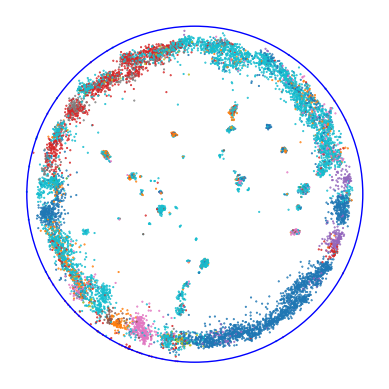

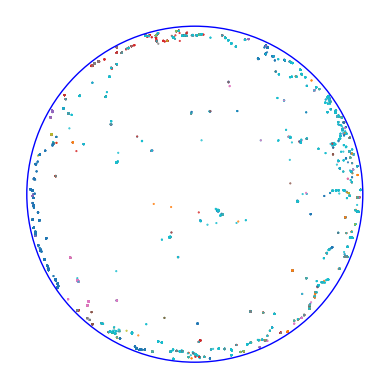

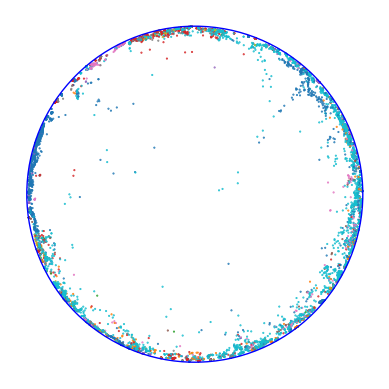

In [20]:
## C_ELEGANS
dataset = "C_ELEGANS"
label_path = f"experiments_thesis/HyperbolicKL/{dataset}/experiment_7/labels.csv"
labels = np.loadtxt(label_path)

wrong_grad_path = f"experiments_thesis/HyperbolicKL/{dataset}/experiment_7"
wrong_emb = np.loadtxt(wrong_grad_path + "/emb.csv", delimiter=',')
fig_1 = plot_embeddings(wrong_emb, labels=labels)
fig_1.savefig(
    save_loc + f"{dataset}_wrong_emb_lr32.pdf",  # Filename
    dpi=300,          # Resolution in dots per inch (default is 100)
    bbox_inches="tight",  # Adjusts the bounding box to fit the content
    transparent=True  # Saves the figure with a transparent background
)

wrong_grad_scale_path = f"experiments_thesis/HyperbolicKL/{dataset}/experiment_8"
wrong_scale_emb = np.loadtxt(wrong_grad_scale_path + "/emb.csv", delimiter=',')
fig_2 = plot_embeddings(wrong_scale_emb, labels=labels)
fig_2.savefig(
    save_loc + f"{dataset}_wrong_scale_emb_lr32.pdf",  # Filename
    dpi=300,          # Resolution in dots per inch (default is 100)
    bbox_inches="tight",  # Adjusts the bounding box to fit the content
    transparent=True  # Saves the figure with a transparent background
)

correct_grad_path = f"experiments_thesis/HyperbolicKL/{dataset}/experiment_9"
correct_emb = np.loadtxt(correct_grad_path + "/emb.csv", delimiter=',')
fig_3 = plot_embeddings(correct_emb, labels=labels)
fig_3.savefig(
    save_loc + f"{dataset}_correct_emb_lr32.pdf",  # Filename
    dpi=300,          # Resolution in dots per inch (default is 100)
    bbox_inches="tight",  # Adjusts the bounding box to fit the content
    transparent=True  # Saves the figure with a transparent background
)

plt.show()

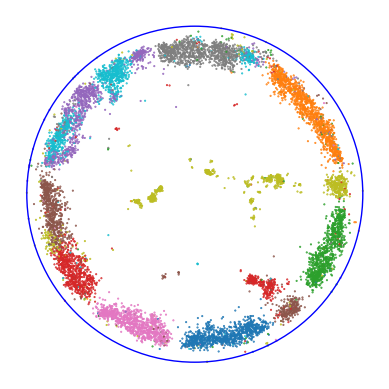

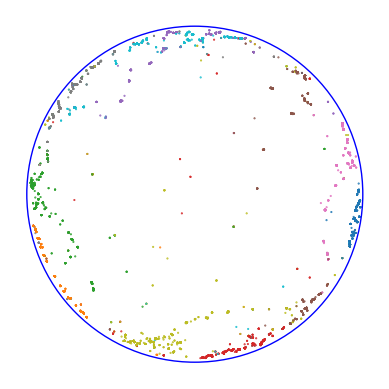

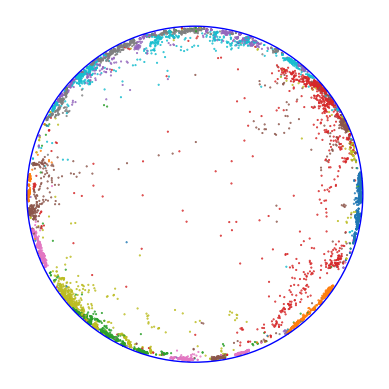

In [21]:
## MNIST
dataset = "MNIST"

label_path = f"experiments_thesis/HyperbolicKL/{dataset}/experiment_9/labels.csv"
labels = np.loadtxt(label_path)

wrong_grad_path = f"experiments_thesis/HyperbolicKL/{dataset}/experiment_9"
wrong_emb = np.loadtxt(wrong_grad_path + "/emb.csv", delimiter=',')
fig_1 = plot_embeddings(wrong_emb, labels=labels)
fig_1.savefig(
    save_loc + f"{dataset}_wrong_emb_lr32.pdf",  # Filename
    dpi=300,          # Resolution in dots per inch (default is 100)
    bbox_inches="tight",  # Adjusts the bounding box to fit the content
    transparent=True  # Saves the figure with a transparent background
)

wrong_grad_scale_path = f"experiments_thesis/HyperbolicKL/{dataset}/experiment_10"
wrong_scale_emb = np.loadtxt(wrong_grad_scale_path + "/emb.csv", delimiter=',')
fig_2 = plot_embeddings(wrong_scale_emb, labels=labels)
fig_2.savefig(
    save_loc + f"{dataset}_wrong_scale_emb_lr32.pdf",  # Filename
    dpi=300,          # Resolution in dots per inch (default is 100)
    bbox_inches="tight",  # Adjusts the bounding box to fit the content
    transparent=True  # Saves the figure with a transparent background
)

correct_grad_path = f"experiments_thesis/HyperbolicKL/{dataset}/experiment_11"
correct_emb = np.loadtxt(correct_grad_path + "/emb.csv", delimiter=',')
fig_3 = plot_embeddings(correct_emb, labels=labels)
fig_3.savefig(
    save_loc + f"{dataset}_correct_emb_lr32.pdf",  # Filename
    dpi=300,          # Resolution in dots per inch (default is 100)
    bbox_inches="tight",  # Adjusts the bounding box to fit the content
    transparent=True  # Saves the figure with a transparent background
)

plt.show()

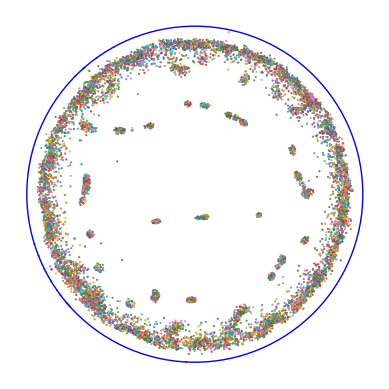

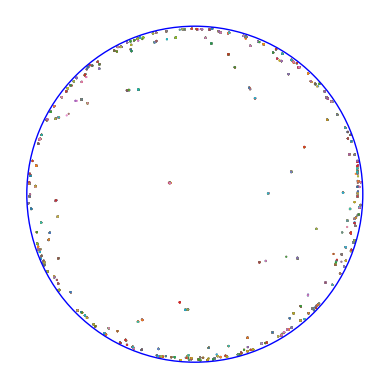

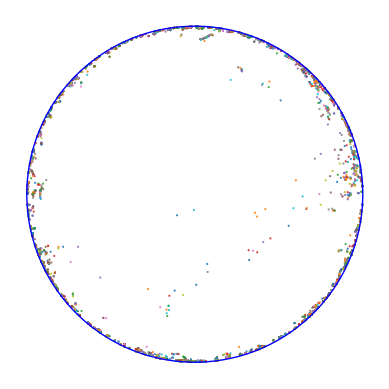

In [23]:
## WORDNET
dataset = "WORDNET"

label_path = f"experiments_thesis/HyperbolicKL/{dataset}/experiment_1/labels.csv"
labels = np.loadtxt(label_path)

wrong_grad_path = f"experiments_thesis/HyperbolicKL/{dataset}/experiment_5"
wrong_emb = np.loadtxt(wrong_grad_path + "/emb.csv", delimiter=',')
fig_1 = plot_embeddings(wrong_emb, labels=labels)
fig_1.savefig(
    save_loc + f"{dataset}_wrong_emb_lr32.pdf",  # Filename
    dpi=300,          # Resolution in dots per inch (default is 100)
    bbox_inches="tight",  # Adjusts the bounding box to fit the content
    transparent=True  # Saves the figure with a transparent background
)

wrong_grad_scale_path = f"experiments_thesis/HyperbolicKL/{dataset}/experiment_6"
wrong_scale_emb = np.loadtxt(wrong_grad_scale_path + "/emb.csv", delimiter=',')
fig_2 = plot_embeddings(wrong_scale_emb, labels=labels)
fig_2.savefig(
    save_loc + f"{dataset}_wrong_scale_emb_lr32.pdf",  # Filename
    dpi=300,          # Resolution in dots per inch (default is 100)
    bbox_inches="tight",  # Adjusts the bounding box to fit the content
    transparent=True  # Saves the figure with a transparent background
)

correct_grad_path = f"experiments_thesis/HyperbolicKL/{dataset}/experiment_7"
correct_emb = np.loadtxt(correct_grad_path + "/emb.csv", delimiter=',')
fig_3 = plot_embeddings(correct_emb, labels=labels)
fig_3.savefig(
    save_loc + f"{dataset}_correct_emb_lr32.pdf",  # Filename
    dpi=300,          # Resolution in dots per inch (default is 100)
    bbox_inches="tight",  # Adjusts the bounding box to fit the content
    transparent=True  # Saves the figure with a transparent background
)

plt.show()

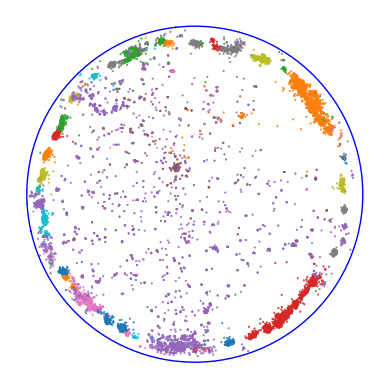

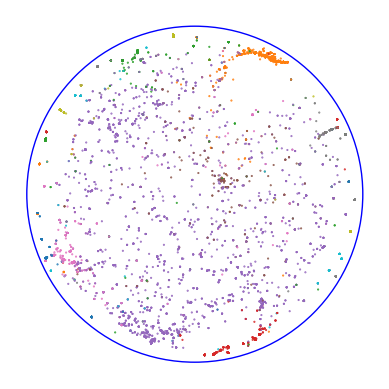

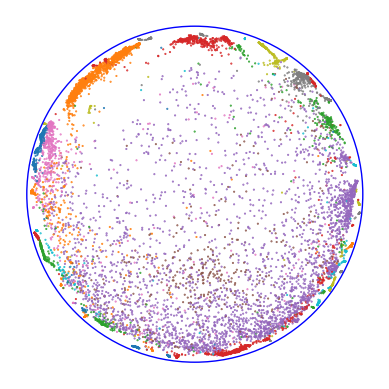

In [24]:
## PLANARIA
dataset = "PLANARIA"

label_path = f"experiments_thesis/HyperbolicKL/{dataset}/experiment_1/labels.csv"
labels = np.loadtxt(label_path)

wrong_grad_path = f"experiments_thesis/HyperbolicKL/{dataset}/experiment_13"
wrong_emb = np.loadtxt(wrong_grad_path + "/emb.csv", delimiter=',')
fig_1 = plot_embeddings(wrong_emb, labels=labels)
fig_1.savefig(
    save_loc + f"{dataset}_wrong_emb_lr32.pdf",  # Filename
    dpi=300,          # Resolution in dots per inch (default is 100)
    bbox_inches="tight",  # Adjusts the bounding box to fit the content
    transparent=True  # Saves the figure with a transparent background
)

wrong_grad_scale_path = f"experiments_thesis/HyperbolicKL/{dataset}/experiment_14"
wrong_scale_emb = np.loadtxt(wrong_grad_scale_path + "/emb.csv", delimiter=',')
fig_2 = plot_embeddings(wrong_scale_emb, labels=labels)
fig_2.savefig(
    save_loc + f"{dataset}_wrong_scale_emb_lr32.pdf",  # Filename
    dpi=300,          # Resolution in dots per inch (default is 100)
    bbox_inches="tight",  # Adjusts the bounding box to fit the content
    transparent=True  # Saves the figure with a transparent background
)

correct_grad_path = f"experiments_thesis/HyperbolicKL/{dataset}/experiment_15"
correct_emb = np.loadtxt(correct_grad_path + "/emb.csv", delimiter=',')
fig_3 = plot_embeddings(correct_emb, labels=labels)
fig_3.savefig(
    save_loc + f"{dataset}_correct_emb_lr32.pdf",  # Filename
    dpi=300,          # Resolution in dots per inch (default is 100)
    bbox_inches="tight",  # Adjusts the bounding box to fit the content
    transparent=True  # Saves the figure with a transparent background
)

plt.show()